# Various functions for data analysis w ATLASPix
## Miscellaneous 

In [1]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
voltageArr=[0.3+(i*0.1) for i in range (16)]
print(voltageArr)

[0.3, 0.4, 0.5, 0.6000000000000001, 0.7, 0.8, 0.9000000000000001, 1.0, 1.1, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6, 1.7000000000000002, 1.8]


In [74]:
#arrays = energy resolution and error on energy resolution
amp1Arr=[[48.26,28.8,22.51,16.18,11.31,9.83,9.03,6.58,6.85,6.49,5.85,5.15,5.41,5.07,5,5.52],[0.2407,0.07892,0.3,0.0739,0.0228,0.013,0.06834,0.03785,0.00158,0.001,0.01362,0.03202,0.00223,0.00633,0.00817,0.00423]]
amp2Arr=[[27.43,18.98,13.14,10.83,8.81,7.86,6.55,6.35,6.15,5.59,5.15,4.41,4.74,4.83,4.7,4.57],[0.12182,0.05424,0.05574,0.01222,0.00754,0.03789,0.00379,0.00418,0.01146,0.00149,0.00591,0.03045,0.00105,0.00364,0.01036,0.00626]]

amp1Arr_gain=[-1 for x in range(len(voltageArr))]
amp1Arr_gain[1]=23.87
amp1Arr_gain[4]=9.27
amp1Arr_gain[7]=6.61
amp1Arr_gain[10]=5.06
amp1Arr_gain[13]=4.42
amp2Arr_gain=[-1 for x in range(len(voltageArr))]
amp2Arr_gain[1]=17.18
amp2Arr_gain[4]=7.93
amp2Arr_gain[7]=5.64
amp2Arr_gain[10]=5.03
amp2Arr_gain[13]=4.81

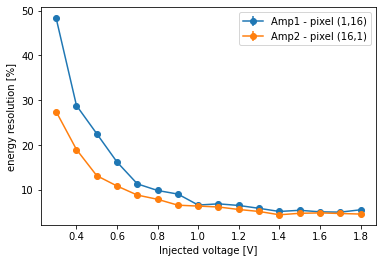

In [75]:
a1=plt.errorbar(voltageArr,amp1Arr[0],yerr=amp1Arr[1],marker="o")
a1.set_label('Amp1 - pixel (1,16)')
a2=plt.errorbar(voltageArr,amp2Arr[0],yerr=amp2Arr[1],marker="o")
a2.set_label('Amp2 - pixel (16,1)')

plt.xlabel('Injected voltage [V]')
plt.ylabel('energy resolution [%]')
plt.legend()

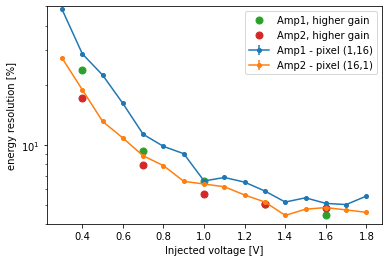

In [76]:
a1=plt.errorbar(voltageArr,amp1Arr[0],yerr=amp1Arr[1],marker="o",markersize=4)
a1.set_label('Amp1 - pixel (1,16)')
a2=plt.errorbar(voltageArr,amp2Arr[0],yerr=amp2Arr[1],marker="o",markersize=4)
a2.set_label('Amp2 - pixel (16,1)')
a1_1,=plt.plot(voltageArr,amp1Arr_gain,'o',ms=7)
a1_1.set_label('Amp1, higher gain')
a2_1,=plt.plot(voltageArr,amp2Arr_gain,'o',ms=7)
a2_1.set_label('Amp2, higher gain')

plt.ylim([4,50])
plt.yscale('log')
plt.xlabel('Injected voltage [V]')
plt.ylabel('energy resolution [%]')
plt.legend()

In [77]:
#percent improvement with vnfb=1 (over vnfb=2)
print("Energy resolution % improvement (Amp1, Amp2):")
for i in range (len(voltageArr)):
    amp1Perc,amp2Perc=0.,0.
    if amp1Arr_gain[i]>0:
        amp1Perc=(amp1Arr_gain[i]-amp1Arr[0][i])/amp1Arr[0][i]*100.
    if amp2Arr_gain[i]>0:
        amp2Perc=(amp2Arr_gain[i]-amp2Arr[0][i])/amp2Arr[0][i]*100.
    print('%0.2f V:(%0.3f , %0.3f)' %(voltageArr[i], -amp1Perc, -amp2Perc))

Energy resolution % improvement (Amp1, Amp2):
0.30 V:(-0.000 , -0.000)
0.40 V:(17.118 , 9.484)
0.50 V:(-0.000 , -0.000)
0.60 V:(-0.000 , -0.000)
0.70 V:(18.037 , 9.989)
0.80 V:(-0.000 , -0.000)
0.90 V:(-0.000 , -0.000)
1.00 V:(-0.456 , 11.181)
1.10 V:(-0.000 , -0.000)
1.20 V:(-0.000 , -0.000)
1.30 V:(13.504 , 2.330)
1.40 V:(-0.000 , -0.000)
1.50 V:(-0.000 , -0.000)
1.60 V:(12.821 , 0.414)
1.70 V:(-0.000 , -0.000)
1.80 V:(-0.000 , -0.000)


In [81]:
#plot average peak height vs injected voltage for each pixel - check if any nonlinearities in response yet
#(maybe wobbley behavior of energy resolution at high injection relates to this)

amp1mu=[0.048,0.0799,0.1091,0.1347,0.1580,0.1778,0.1951,0.2095,0.2215,0.2346,0.2468,0.2589,0.2690,0.2763,0.2799,0.2838]
amp1sigma=[0.0098,0.0098,0.0104,0.0093,0.0076,0.0074,0.0075,0.0059,0.0064,0.0065,0.0061,0.0057,0.0062,0.0059,0.0059,0.0067]
amp2mu=[0.0728,0.1060,0.1353,0.1589,0.1806,0.1978,0.2128,0.2260,0.2395,0.2524,0.2647,0.2766,0.288,0.2945,0.2987,0.3029]
amp2sigma=[0.0085,0.0085,0.0076,0.0073,0.0068,0.0066,0.0059,0.0061,0.0063,0.006,0.0058,0.0052,0.0058,0.006,0.006,0.0059]

amp1mu_gain=[-1,0.1033,-1,-1,0.1834,-1,-1,0.2326,-1,-1,0.2733,-1,-1,0.3048,-1,-1]
amp1sigma_gain=[-1,0.0105,-1,-1,0.0072,-1,-1,0.0065,-1,-1,0.0059,-1,-1,0.0057,-1,-1]
amp2mu_gain=[-1,0.1272,-1,-1,0.2014,-1,-1,0.249,-1,-1,0.2873,-1,-1,0.3198,-1,-1]
amp2sigma_gain=[-1,0.0093,-1,-1,0.0068,-1,-1,0.006,-1,-1,0.0061,-1,-1,0.0065,-1,-1]


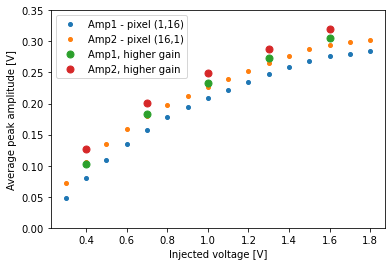

In [83]:
a1mu,=plt.plot(voltageArr,amp1mu,'o',ms=4)
a1mu.set_label('Amp1 - pixel (1,16)')
a2mu,=plt.plot(voltageArr,amp2mu,'o',ms=4)
a2mu.set_label('Amp2 - pixel (16,1)')
a1mu_1,=plt.plot(voltageArr,amp1mu_gain,'o',ms=7)
a1mu_1.set_label('Amp1, higher gain')
a2mu_1,=plt.plot(voltageArr,amp2mu_gain,'o',ms=7)
a2mu_1.set_label('Amp2, higher gain')

plt.ylim([0,0.35])
plt.xlabel('Injected voltage [V]')
plt.ylabel('Average peak amplitude [V]')
plt.legend()

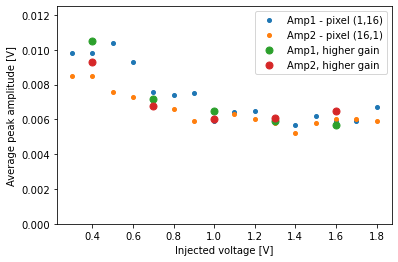

In [89]:
a1sigma,=plt.plot(voltageArr,amp1sigma,'o',ms=4)
a1sigma.set_label('Amp1 - pixel (1,16)')
a2sigma,=plt.plot(voltageArr,amp2sigma,'o',ms=4)
a2sigma.set_label('Amp2 - pixel (16,1)')
a1sigma_1,=plt.plot(voltageArr,amp1sigma_gain,'o',ms=7)
a1sigma_1.set_label('Amp1, higher gain')
a2sigma_1,=plt.plot(voltageArr,amp2sigma_gain,'o',ms=7)
a2sigma_1.set_label('Amp2, higher gain')

plt.ylim([0,0.01])
plt.xlabel('Injected voltage [V]')
plt.ylabel('Average peak amplitude [V]')
plt.legend()

In [1]:
import h5py, numpy as np

In [8]:
f = h5py.File('../dataOut/101921_amp1/cobalt57_14h.h5py', 'a')
run=str(80)
count=str(4)

OSError: Unable to open file (truncated file: eof = 96, sblock->base_addr = 0, stored_eof = 2048)

In [9]:
list(f.keys())

['run1_scaling']

In [22]:
array=f['run'+count+'_hv'+run]
array_t=f['run'+count+'_hv'+run+'_t']

In [23]:
g = h5py.File('../dataOut/101821_amp2/0.05Vinj_HV'+run+'.h5py','a')
g.create_dataset('run1_hv'+run,data=array)
g.create_dataset('run1_hv'+run+'_t',data=array_t)

<HDF5 dataset "run1_hv80_t": shape (10000,), type "<f8">

In [24]:
f.close()
g.close()